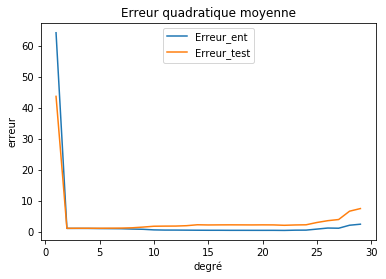

In [19]:
# Régression polynomiale avec sklearn pour des données quadratiques simulées 
# Transformation des données avec PolynomialFeatures
# Diviser les données : entraînement et test
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def h_quadratique_univarie(theta,x):
    return theta[0]+theta[1]*x+theta[2]*x**2

def diviser_ent_test(x,y,proportion):
    taille_x = len(x)
    i_permutes = np.random.permutation(taille_x)
    taille_test = int(taille_x * proportion)
    return x[i_permutes[taille_test:]],y[i_permutes[taille_test:]],x[i_permutes[:taille_test]],y[i_permutes[:taille_test]]

# Génération de données avec résidus ~ N(0,1)
m=80 # nombre de lignes de données
theta_simule = (1,1,1)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*10-5 # m valeurs de x entre -5 et 5
Y = h_quadratique_univarie(theta_simule,X)+np.random.randn(m) # Résidus N(0,1)

liste_erreurs_ent = []
liste_erreurs_test = []

X_ent,Y_ent,X_test,Y_test = diviser_ent_test(X,Y, 0.5)

degre_max = 30
for degre_polynome in range(1,degre_max):

    # Transformation par PolynomialFeatures
    transformateur_poly = PolynomialFeatures(degree=degre_polynome, include_bias=False)
    X_poly_test = transformateur_poly.fit_transform(X_test[:,np.newaxis])
    X_poly_ent = transformateur_poly.fit_transform(X_ent[:,np.newaxis])

    # Régression avec LinearRegression
    modele = LinearRegression(fit_intercept=True)
    modele.fit(X_poly_ent,Y_ent)

    # Produire estimations et erreur pour les données d'entrainment et de test
    Y_estime_ent = modele.predict(X_poly_ent)
    erreur_ent = mean_squared_error(Y_ent,Y_estime_ent)
    liste_erreurs_ent.append(erreur_ent)
    Y_estime_test = modele.predict(X_poly_test)
    erreur_test = mean_squared_error(Y_test,Y_estime_test)
    liste_erreurs_test.append(erreur_test)

liste_degre = np.arange(1,degre_max)
plt.plot(liste_degre,liste_erreurs_ent,label='Erreur_ent')
plt.plot(liste_degre,liste_erreurs_test,label='Erreur_test')
plt.title("Erreur quadratique moyenne")
plt.xlabel('degré')
plt.ylabel('erreur')
plt.legend(loc='upper center')
plt.show()